# Good and Bad Customers for Granting Credit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bcc= pd.read_csv('BankCreditCard.csv')

In [3]:
bcc.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

## Check for Null Value

In [4]:
bcc.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

There is no null value, so we can move forward with visualization and see if the target variable is balanced

In [5]:
bcc.shape

(30000, 25)

In [6]:
bcc.Default_Payment.unique()

array([1, 0], dtype=int64)

In [8]:
bcc['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

#### We can see that there is a 78% belongs to '0'=No Payment and 22% belongs to '1'= Yes Payment. We will use Oversampling and undersampling method to check which model performs better

## Graphical EDA

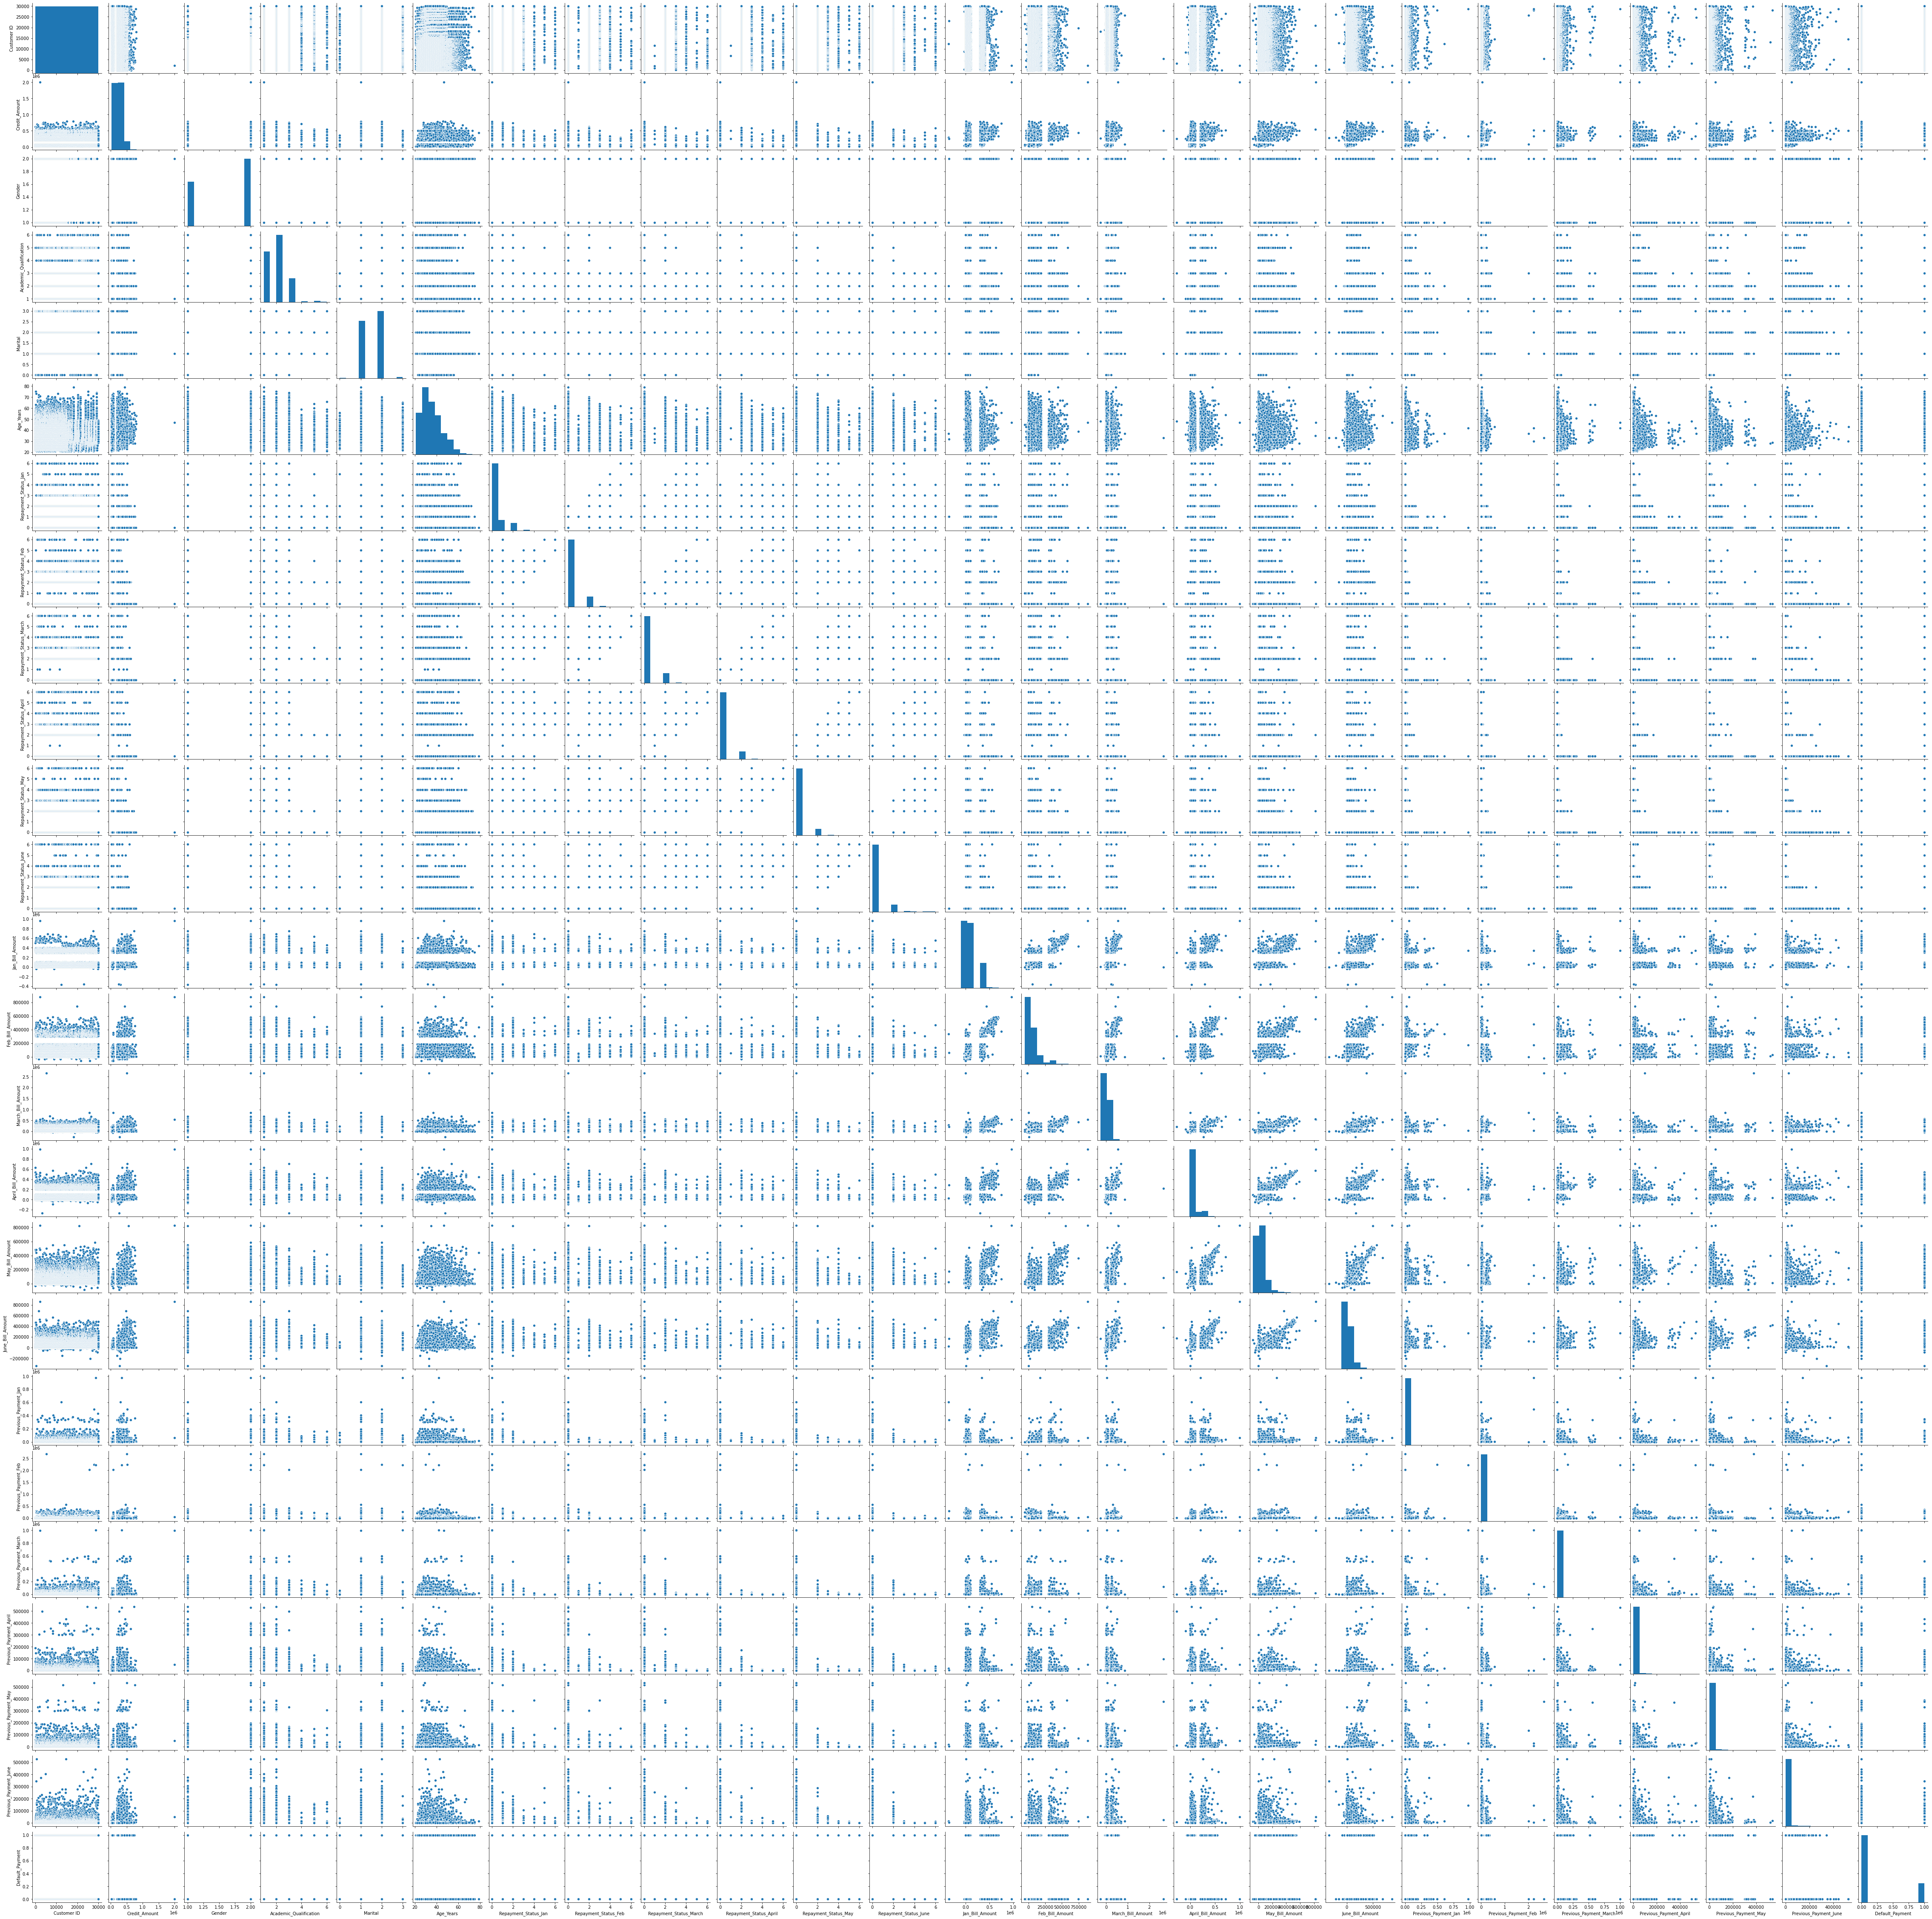

In [6]:
sns.pairplot(bcc)

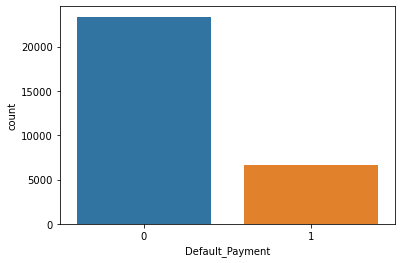

In [7]:
sns.countplot(bcc['Default_Payment'])

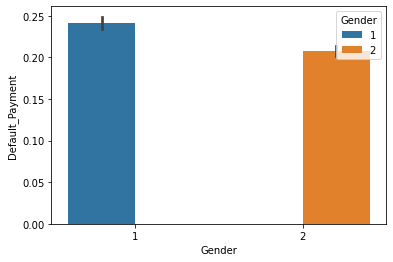

In [8]:
sns.barplot(bcc['Gender'], bcc['Default_Payment'],hue= bcc.Gender)

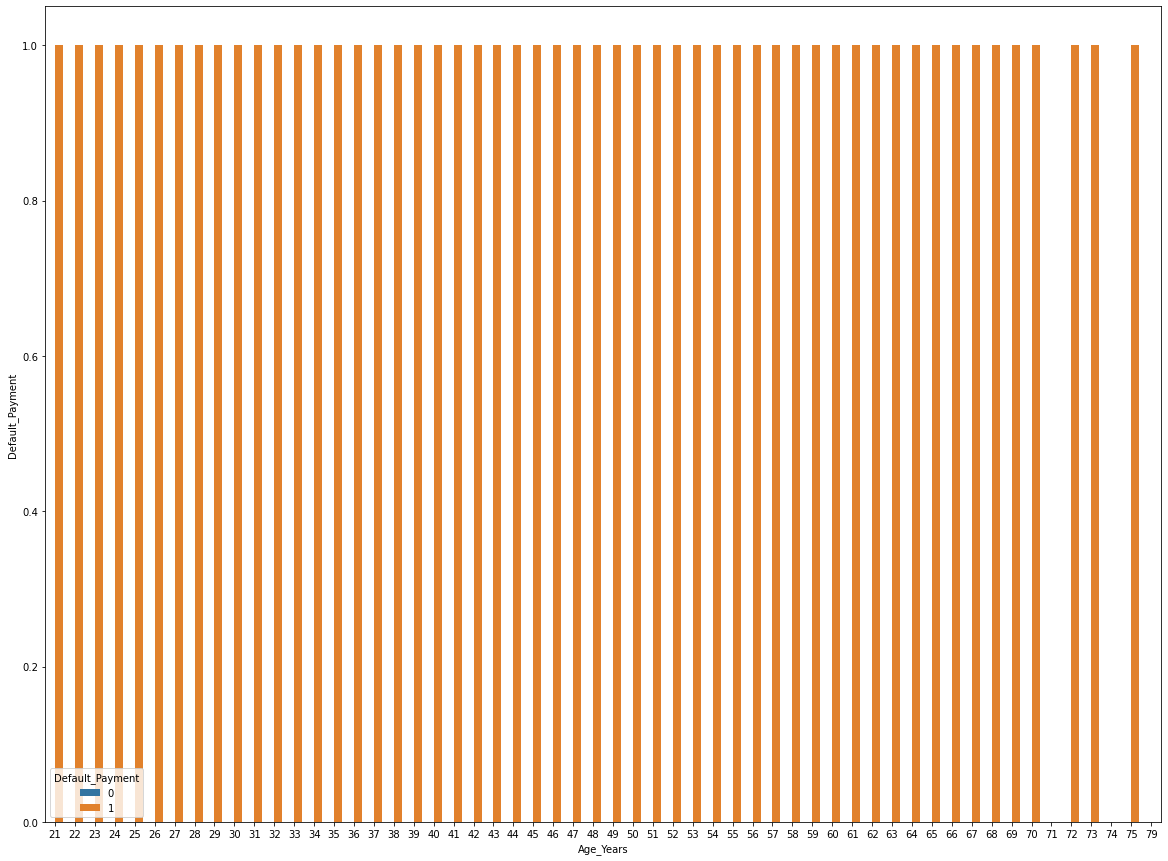

In [9]:
plt.figure(figsize=(20,15))
sns.barplot(bcc['Age_Years'], bcc['Default_Payment'],hue=bcc.Default_Payment)

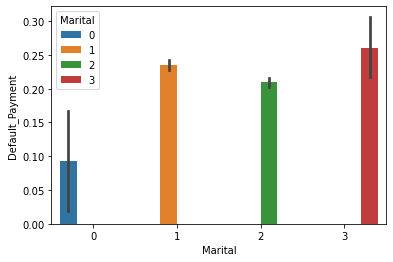

In [10]:
sns.barplot(bcc['Marital'],bcc['Default_Payment'], hue=bcc['Marital'] )

##### We can see category 0 which is not which is not defined in the data description. So, removing the category 0.

In [11]:
bcc.drop(bcc[bcc['Marital'] ==0].index, inplace = True)

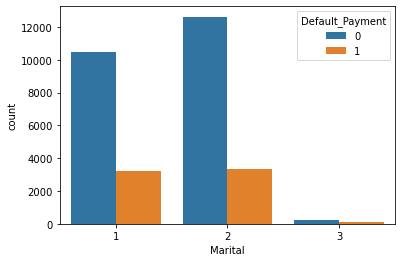

In [12]:
sns.countplot(data=bcc, x=bcc.Marital, hue=bcc.Default_Payment)

#### The category 2 i.e., Single are the ones who stands first in terms of making no payment, then category 1= Married. However,Category 3 is balanced.  

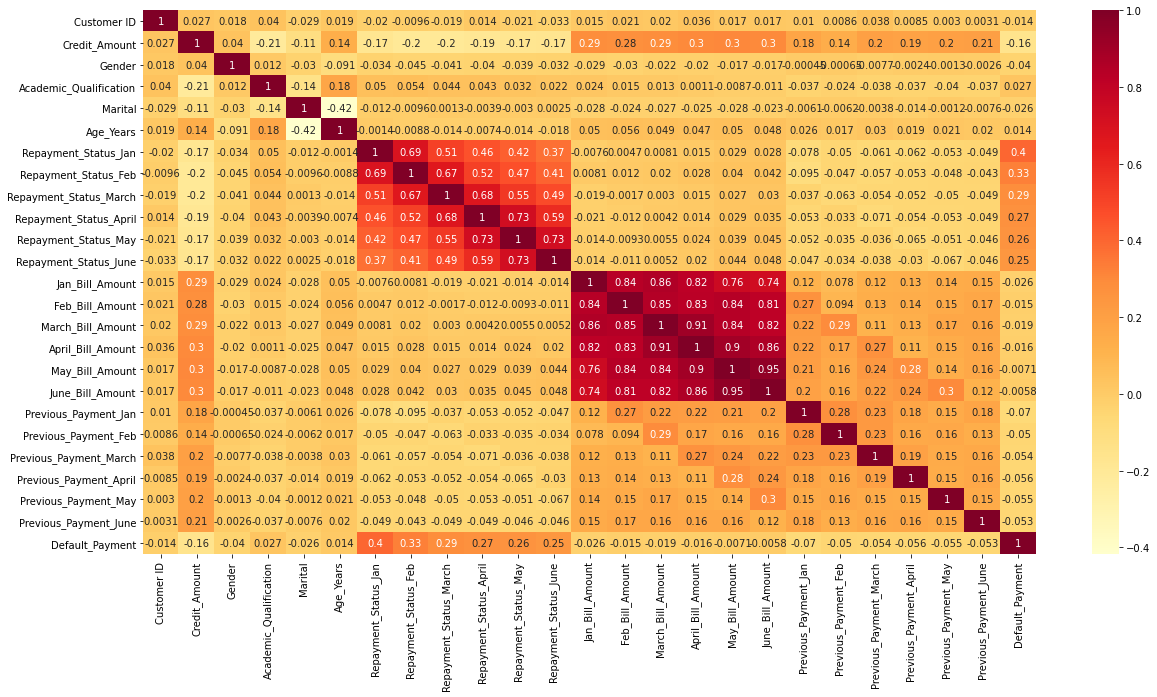

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(bcc.corr(),annot= True, cmap="YlOrRd")

## Model Building

In [13]:
bcc1= bcc.drop('Customer ID',axis=1)

In [14]:
x=bcc1.drop('Default_Payment',axis=1)
y=bcc['Default_Payment']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [17]:
sc.fit_transform(x_train)

array([[-1.00240753, -1.23463583,  0.18821602, ..., -0.24323394,
        -0.23255101, -0.22950211],
       [ 0.2760434 ,  0.80995544,  0.18821602, ..., -0.03775134,
        -0.01586625, -0.299085  ],
       [ 0.50165238, -1.23463583,  0.18821602, ..., -0.30965499,
         0.01341548, -0.299085  ],
       ...,
       [ 0.2008404 , -1.23463583,  1.45642053, ..., -0.30965499,
         2.84700796,  5.82768875],
       [ 0.50165238,  0.80995544,  0.18821602, ...,  1.55122148,
        -0.30868349, -0.299085  ],
       [ 0.2008404 , -1.23463583, -1.07998849, ..., -0.10924455,
        -0.12637548,  0.01461787]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
glm= LogisticRegression()

In [20]:
glm.fit(x_train,y_train)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pred= glm.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7028
           1       0.50      0.00      0.00      1956

    accuracy                           0.78      8984
   macro avg       0.64      0.50      0.44      8984
weighted avg       0.72      0.78      0.69      8984



In [24]:
print(confusion_matrix(y_test,pred))

[[7027    1]
 [1955    1]]


In [27]:
false_positive_rate, true_positive_rate, threshold2 = roc_curve(y_test, pred)

In [28]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, pred))

roc_auc_score for Logistic Regression:  0.5001844797264346


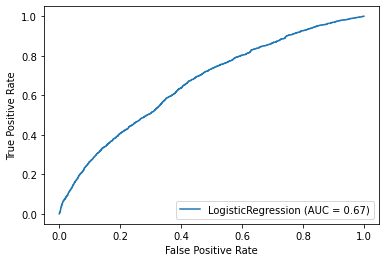

In [36]:
from sklearn import metrics
metrics.plot_roc_curve(glm, x_test, y_test)

## Trying to see the model accuracy after OverSamplling with SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm= SMOTE()
x_train_sm,y_train_sm= sm.fit_resample(x_train,y_train)

In [40]:
print(y_train_sm.value_counts())

1    16287
0    16287
Name: Default_Payment, dtype: int64


In [41]:
sc.fit_transform(x_train_sm)

array([[-0.91348301, -1.01659248,  0.32004086, ..., -0.22674603,
        -0.21051519, -0.20827539],
       [ 0.38192756,  0.98367834,  0.32004086, ...,  0.01326513,
         0.03210915, -0.28811338],
       [ 0.61052942, -1.01659248,  0.32004086, ..., -0.30432824,
         0.06489623, -0.28811338],
       ...,
       [ 0.44004331, -1.01659248,  0.32004086, ..., -0.05800353,
        -0.01986312, -0.09265804],
       [-0.68488114,  0.98367834,  0.32004086, ..., -0.11285443,
        -0.19151012, -0.21251849],
       [-0.98968363,  0.98367834,  0.32004086, ..., -0.21404363,
        -0.29576157, -0.25489591]])

In [42]:
glm.fit(x_train_sm,y_train_sm)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
pred1= glm.predict(x_test)

In [44]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      7028
           1       0.34      0.47      0.40      1956

    accuracy                           0.69      8984
   macro avg       0.59      0.61      0.59      8984
weighted avg       0.73      0.69      0.70      8984



## Trying to see the model accuracy after UnderSamplling with TomekLink

In [45]:
from imblearn.under_sampling import TomekLinks

In [46]:
tl= TomekLinks(sampling_strategy='majority')

In [47]:
x_tl, y_tl= tl.fit_sample(x_train, y_train)

In [48]:
sc.fit_transform(x_tl)

array([[ 0.2637961 ,  0.80859551,  0.19325253, ..., -0.04359721,
        -0.02099097, -0.30547997],
       [ 0.48907862, -1.23671228,  0.19325253, ..., -0.31179365,
         0.00795687, -0.30547997],
       [ 1.089832  ,  0.80859551, -1.07959335, ...,  0.03656988,
        -0.09434477,  2.60748466],
       ...,
       [ 0.18870193, -1.23671228,  1.46609841, ..., -0.31179365,
         2.80923853,  5.85019687],
       [ 0.48907862,  0.80859551,  0.19325253, ...,  1.5237111 ,
        -0.31046928, -0.30547997],
       [ 0.18870193, -1.23671228, -1.07959335, ..., -0.11411566,
        -0.13024008,  0.0097028 ]])

In [49]:
glm.fit(x_tl,y_tl)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred2= glm.predict(x_test)

In [51]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7028
           1       0.73      0.00      0.01      1956

    accuracy                           0.78      8984
   macro avg       0.76      0.50      0.44      8984
weighted avg       0.77      0.78      0.69      8984



### From this exercise, we conclude that logistic regression model without sampling and undersampling gives the same accuracy score for predicting this dataset.